# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@". 

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv("../data/states_edu.csv")
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *Grade 4 Reading*

How many years of data are logged in our dataset? 

In [3]:
# @@@ 1
# Your Code
len(df["YEAR"].unique())

33

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [4]:
# @@@ 2
michigan_avg =df[df["STATE"]== "MICHIGAN"]["AVG_READING_4_SCORE"].mean()
ohio_avg = df[df["STATE"]== "OHIO"]["AVG_READING_4_SCORE"].mean()
print("Ohio" if ohio_avg > michigan_avg else "Michigan")

Ohio


Find the average for your chosen test across all states in 2019

In [5]:
# @@@ 3
float(df[df["YEAR"]== 2019]["AVG_READING_4_SCORE"].mean())

219.79245283018867

For each state, find a maximum value for your chosen test score

In [6]:
# @@@ 4
df.groupby("STATE")["AVG_READING_4_SCORE"].max()

STATE
ALABAMA                 220.0
ALASKA                  214.0
ARIZONA                 216.0
ARKANSAS                219.0
CALIFORNIA              216.0
COLORADO                227.0
CONNECTICUT             230.0
DELAWARE                226.0
DISTRICT_OF_COLUMBIA    214.0
DODEA                   235.0
FLORIDA                 228.0
GEORGIA                 222.0
HAWAII                  218.0
IDAHO                   223.0
ILLINOIS                222.0
INDIANA                 227.0
IOWA                    225.0
KANSAS                  225.0
KENTUCKY                228.0
LOUISIANA               216.0
MAINE                   228.0
MARYLAND                232.0
MASSACHUSETTS           237.0
MICHIGAN                220.0
MINNESOTA               227.0
MISSISSIPPI             219.0
MISSOURI                224.0
MONTANA                 227.0
NATIONAL                223.0
NEBRASKA                227.0
NEVADA                  218.0
NEW_HAMPSHIRE           232.0
NEW_JERSEY              233.0
NEW_

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [7]:
# @@@ 5
#Adding a column for expenditure per (grade 4) students, and state and local revenue per student as a percentage of.
df["EXPENDITURE PER GRADE 4 STUDENT"]  = df["TOTAL_EXPENDITURE"] / df["GRADES_4_G"]
df["STATE AND LOCAL REVENUE AS A PERCENT OF THE WHOLE"] = (df["STATE_REVENUE"] + df["LOCAL_REVENUE"]) / df["TOTAL_REVENUE"]

Feature engineering justification: *Reason for adding expenditure per (grade 4) student is because the states have different population, so this will control for that. Local and State Revenue as a percent of total Revenue will show the impact of local and state investment priority in education as opposed to the federal gov't/nation as a whole/people from other states/localities.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, 'SCORE')

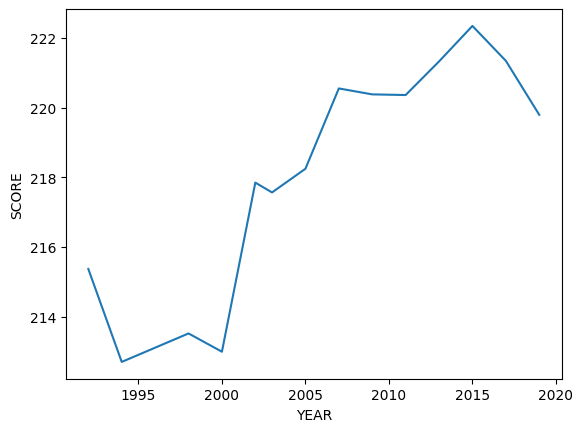

In [8]:
# @@@ 6
# Chart of Scores avg scores over each year

df.groupby("YEAR")["AVG_READING_4_SCORE"].mean().dropna().plot()
plt.ylabel("SCORE")

**This shows the relationship between scores (4th grade reading) and time. from this data we can see that scores have generally risen overt time, except in the ealry 1990s and between 2015 and 2020. Scores increased quickly around 2000 and started to level off over time peaking arouund 2015.**

**Visualization 2**

Text(0, 0.5, 'SCORE')

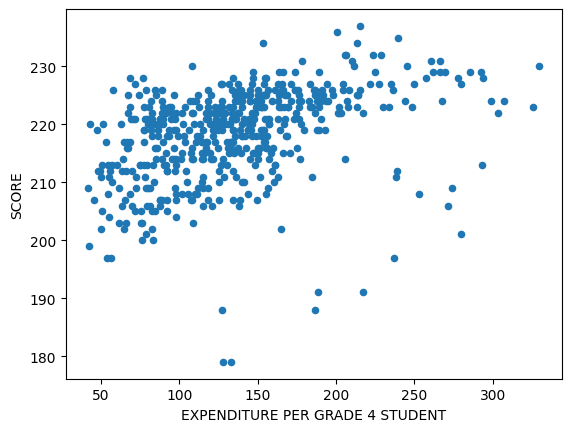

In [9]:
# @@@ 7

#creating a catter chart of score against expendirtures per grade four student.
df.plot.scatter(x = "EXPENDITURE PER GRADE 4 STUDENT", y = "AVG_READING_4_SCORE")
plt.ylabel("SCORE")

**This chart is a scatterplot of score against expenditures per grade 4 student. It does appear that there is a bit of a postive correlation between expenditures per student and scores.**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# @@@ 8
#creating a new dataframe for all of the features incolved in the model so that rows with missing values can be removed, then separating 
# the data into X and y.
df_ML_model = df[["EXPENDITURE PER GRADE 4 STUDENT", "STATE AND LOCAL REVENUE AS A PERCENT OF THE WHOLE", "YEAR", "AVG_READING_4_SCORE"]].dropna()
X = df_ML_model[["EXPENDITURE PER GRADE 4 STUDENT", "STATE AND LOCAL REVENUE AS A PERCENT OF THE WHOLE", "YEAR"]]
y = df_ML_model["AVG_READING_4_SCORE"]

In [12]:
# @@@ 9 
# splitting into training and test data, using a test size of 0.3.
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size= 0.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [13]:
# @@@ 10
# import your sklearn class here
# We will be using linear regression so importing that
from sklearn.linear_model import LinearRegression

In [14]:
# @@@ 11
# create your model here 
model = LinearRegression()

In [15]:
model.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [17]:
# @@@ 12
print("R^2 is", model.score(X_test, y_test))
print("Mean error is", np.mean(model.predict(X_test)-y_test))
print("Mean absolute Error is", np.mean(abs(model.predict(X_test)-y_test)))
print("Root mean squared error is", np.mean((model.predict(X_test)-y_test)**2)**0.5)

R^2 is 0.4398661960677447
Mean error is -0.036308306604403776
Mean absolute Error is 4.315145913766324
Root mean squared error is 6.008481475794314


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

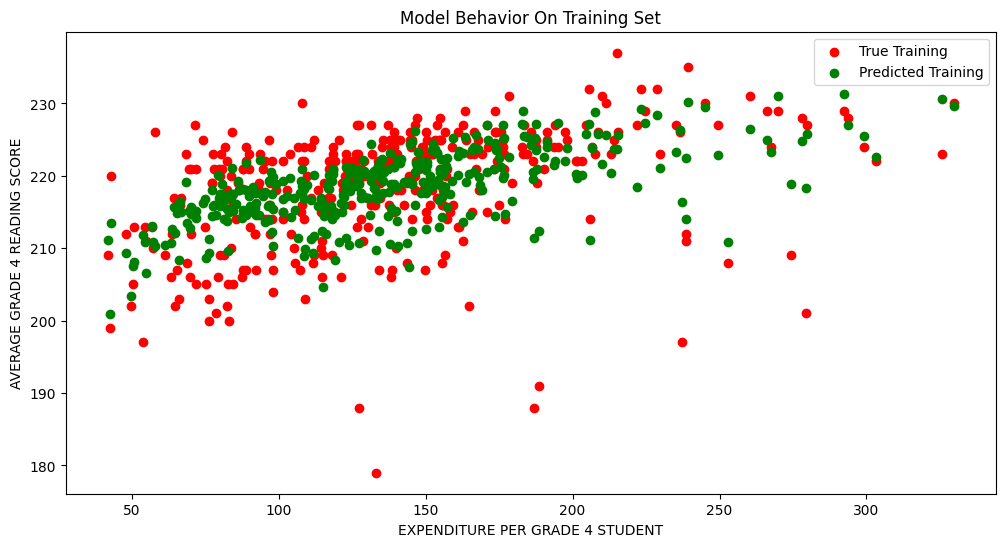

In [18]:
# @@@ 13

# For both the train and test data charts, I will be looking at the effect of Expenditures per grade 4 student.
col_name = "EXPENDITURE PER GRADE 4 STUDENT"


f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel("AVERAGE GRADE 4 READING SCORE")
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

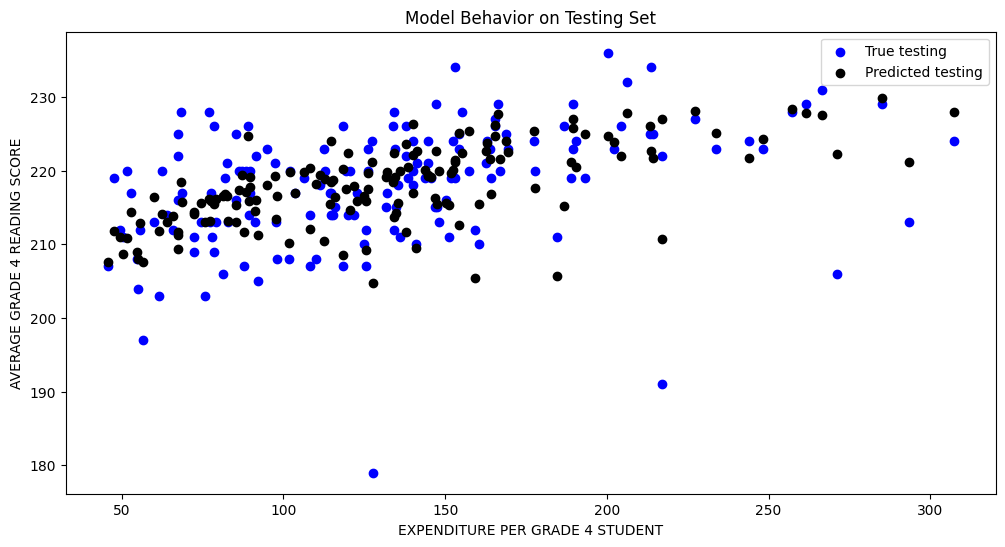

In [19]:
# @@@ 14

# For both the train and test data charts, I will be looking at the effect of Expenditures per grade 4 student.
col_name = "EXPENDITURE PER GRADE 4 STUDENT"


f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel("AVERAGE GRADE 4 READING SCORE")
plt.title("Model Behavior on Testing Set")